#                             Parkinson - Disease -Classifier

## Let Us Import some libraries



In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


#### Data
Data is read from file which was created from data_file.py using data from the dataset

In [96]:
data = pd.read_csv("file.csv")


In [97]:
data

,pressure,grip_angle,timestamp,state,dr/dt-std,dr/dt-mean,dr/dtheta-std,dr/dtheta-mean,max-radius,status
0,884.200931,794.317300,302.283333,static,0.001136,-0.000028,976.576582,145.578645,474.248880,1
1,910.966791,662.641217,377.833333,dynamic,0.001238,0.000317,762.051267,-13.411649,476.961214,1
2,788.450502,782.556671,408.683333,static,0.001047,0.000053,421.391148,27.214883,476.822818,1
3,926.910511,902.801802,390.483333,dynamic,0.001042,0.000288,931.042814,33.902601,473.381453,1
4,843.550013,903.502152,592.650000,static,0.000877,0.000149,363.729628,-2.816179,546.670833,1
...,...,...,...,...,...,...,...,...,...,...
143,686.939242,478.556299,215.633333,dynamic,0.001050,0.000019,1579.723008,234.572943,457.433055,0
144,532.731178,603.585907,242.933333,static,0.001188,0.000010,3534.188498,-365.286700,477.269316,0
145,566.743542,577.607638,313.183333,dynamic,0.002272,-0.000201,1277.711175,112.908229,487.483333,0
146,532.731178,603.585907,242.933333,static,0.001188,0.000010,3534.188498,-365.286700,477.269316,0


Let's check if have any missing data

In [98]:
print(data.isnull().values.any())

False


* How many missing values for each feature

In [99]:
print(data.isnull().sum())

pressure          0
grip_angle        0
timestamp         0
state             0
dr/dt-std         0
dr/dt-mean        0
dr/dtheta-std     0
dr/dtheta-mean    0
max-radius        0
status            0
dtype: int64



  we dont have any missing data
 


In [100]:
data

,pressure,grip_angle,timestamp,state,dr/dt-std,dr/dt-mean,dr/dtheta-std,dr/dtheta-mean,max-radius,status
0,884.200931,794.317300,302.283333,static,0.001136,-0.000028,976.576582,145.578645,474.248880,1
1,910.966791,662.641217,377.833333,dynamic,0.001238,0.000317,762.051267,-13.411649,476.961214,1
2,788.450502,782.556671,408.683333,static,0.001047,0.000053,421.391148,27.214883,476.822818,1
3,926.910511,902.801802,390.483333,dynamic,0.001042,0.000288,931.042814,33.902601,473.381453,1
4,843.550013,903.502152,592.650000,static,0.000877,0.000149,363.729628,-2.816179,546.670833,1
...,...,...,...,...,...,...,...,...,...,...
143,686.939242,478.556299,215.633333,dynamic,0.001050,0.000019,1579.723008,234.572943,457.433055,0
144,532.731178,603.585907,242.933333,static,0.001188,0.000010,3534.188498,-365.286700,477.269316,0
145,566.743542,577.607638,313.183333,dynamic,0.002272,-0.000201,1277.711175,112.908229,487.483333,0
146,532.731178,603.585907,242.933333,static,0.001188,0.000010,3534.188498,-365.286700,477.269316,0


In [101]:
X=data.drop('status',axis=1)
y=data['status']

## Lets split the data using in-built functions from the sklearn library 

In [102]:
# Let us now split the data into train and test before it shuffle the data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state= 42, shuffle=True)


##### Print the shapes of training and test datasets

In [103]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(118, 9)
(118,)
(30, 9)
(30,)


### Lets Look at our shuffled data

In [104]:
print("Train Data:",'\n', X_train.head() )
print('\n',"Test Data:",'\n', X_test.head())

Train Data: 
        pressure   grip_angle    timestamp    state  dr/dt-std  dr/dt-mean  \
136  370.550535   325.873960   100.916667   static   0.000735    0.000083   
45   875.916290   979.216669  1198.900000  dynamic   0.000254   -0.000015   
119  375.504831   421.497585    97.566667  dynamic   0.001013    0.000307   
27   526.950966  2063.368004   236.716667  dynamic   0.000924   -0.000336   
4    843.550013   903.502152   592.650000   static   0.000877    0.000149   

     dr/dtheta-std  dr/dtheta-mean  max-radius  
136     124.651239      -22.048862  490.172419  
45       56.355978        0.789196  457.849320  
119    1872.260803      234.060041  502.143406  
27      950.613763       97.161016  468.363107  
4       363.729628       -2.816179  546.670833  

 Test Data: 
        pressure   grip_angle   timestamp    state  dr/dt-std  dr/dt-mean  \
125  642.890923   543.394355  171.250000  dynamic   0.001117   -0.000322   
51   832.335859  1412.247475  118.750000  dynamic   0.000706  

## Data Visualisation
***
Some data visualisation techniques are used for feature engineering
* Violin plot
* Box plot
* Swarm plot
* correlation matrix
***

# VIolin plot

Let us plot Violin plot for the features and try picking features up

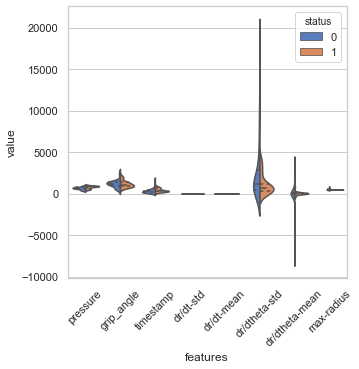

In [89]:
data1 = data.drop(['state'],axis =1)
data_std = (data1 - data1.mean()) / data1.std()
data1 = pd.melt(data1,id_vars ="status",var_name = "features",value_name="value")
plt.figure(figsize=(5,5))
sns.violinplot(x="features",y="value",hue="status",data = data1,split =True,inner="quart")
plt.xticks(rotation=45);

The values of time stamp,dr/dtheta-std and dr/dtheta-mean are very large so couldn't view other features properly

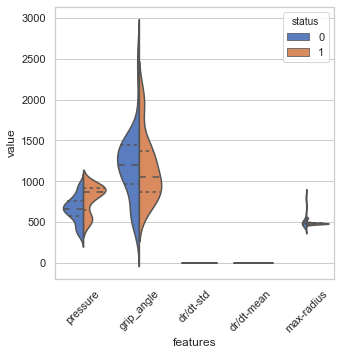

In [90]:
data1 = data.drop(['state','timestamp','dr/dtheta-std','dr/dtheta-mean'],axis =1)
data_std = (data1 - data1.mean()) / data1.std()
data1 = pd.melt(data1,id_vars ="status",var_name = "features",value_name="value")
plt.figure(figsize=(5,5))
sns.violinplot(x="features",y="value",hue="status",data = data1,split =True,inner="quart")
plt.xticks(rotation=45);

# Joint Plot
***
joint plot is used to check if any two features are correlated,we will just plot by taking two features for sake of understanding
***

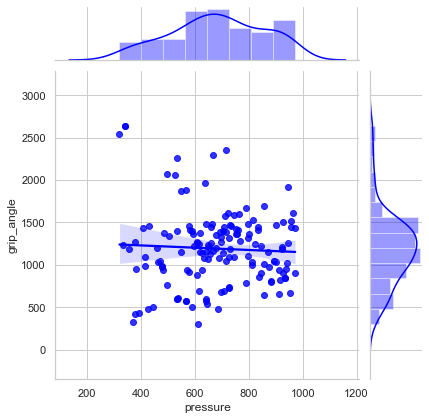

In [91]:
sns.jointplot(data.loc[:,'pressure'],
              data.loc[:,'grip_angle'],
              kind ='regg',
              color= 'blue'
             );

# Swarm Plot 
* TO check if feature can be worth to classify

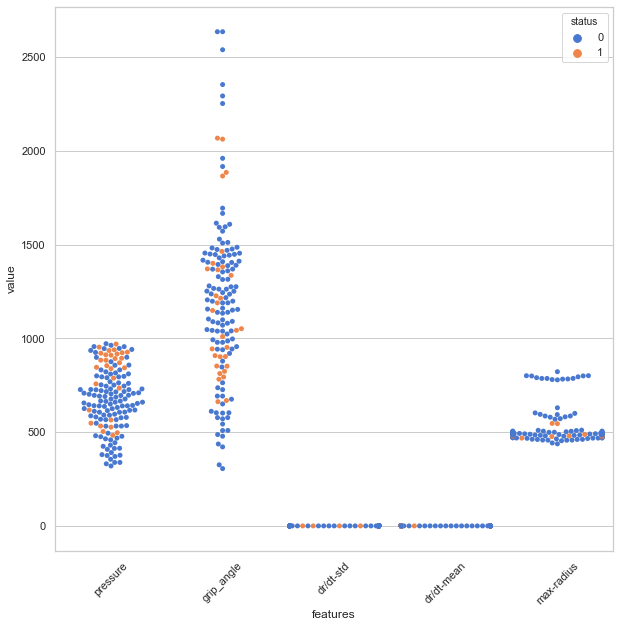

In [92]:
sns.set(style='whitegrid',palette='muted')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features",y="value",hue="status",data = data1)
plt.xticks(rotation=45);

# Correlation Matrix
***
 To check if any of the features are highly correlated for feature extraction
***

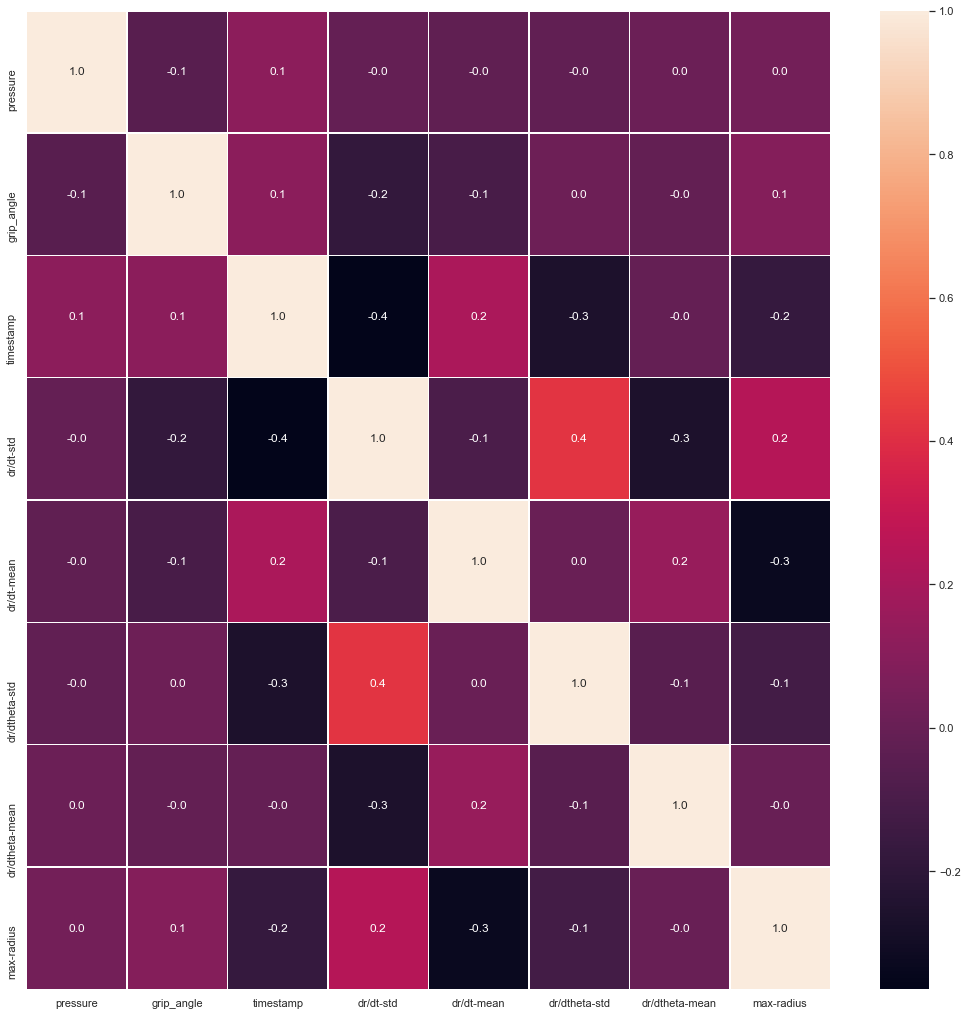

In [93]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(), annot=True ,linewidth=0.5, fmt='.1f',ax=ax);

* we can see that no feature is correlated to any of the other
* let's consider all the features for our model  

In [105]:
features = ["pressure","grip_angle","timestamp","state","dr/dt-std","dr/dt-mean","dr/dtheta-std","dr/dtheta-mean","max-radius"]

X = pd.get_dummies(X_train[features])
X_test = pd.get_dummies(X_test[features])


# Logistic Regression

In [121]:
'''
LOGISTIC REGRESSION MODEL FOR CLASSIFICATION
'''
model2 = LogisticRegression(penalty= 'l2' ,random_state= 42 ,max_iter=20,solver='liblinear').fit(X,y_train)
y_pred2 = model2.predict(X_test)

print("Accuracy of Logistic regression:",metrics.accuracy_score(y_test, y_pred2))

Accuracy of Logistic regression: 0.8333333333333334


## Confusion Matrix

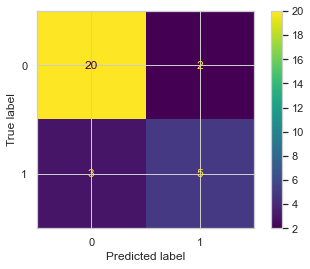

In [122]:
plot_confusion_matrix(model2, X_test, y_test)


In [123]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
print("Precision:" , precision)
print("Recall:",recall)

Precision: [0.26666667 0.8        1.        ]
Recall: [1.  0.5 0. ]


Logistic: f1=0.667 auc=0.783


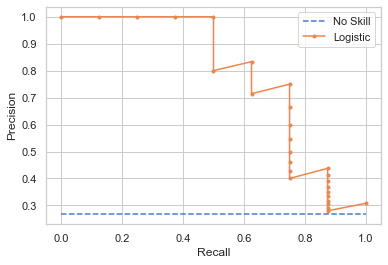

In [124]:
lr_probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [125]:
'''
RANDOM FOREST MODEL FOR CLASSIFICATION
'''


model = RandomForestClassifier(n_estimators = 50,max_depth = 4 ,random_state= 0) 
model.fit(X,y_train)
y_pred = model.predict(X_test)
print("Accuracy of Random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Random Forest: 0.8333333333333334


Random-Forest: f1=0.615 auc=0.860


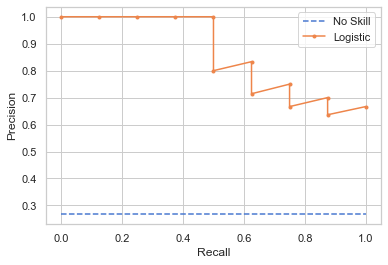

In [128]:
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Random-Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# The Dataset we worked on have imbalance data
***

***

No Skill: ROC AUC=0.500
Random-Forest: ROC AUC=0.943
Logistic: ROC AUC=0.830


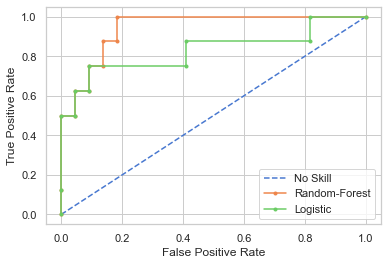

In [127]:

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = model.predict_proba(X_test)
lr_probs2 = model2.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs2 = lr_probs2[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random-Forest: ROC AUC=%.3f' % (lr_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc2))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random-Forest')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Note: This file is still to be updated